In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\yash-\Downloads\unsupervised_data (1).csv")
df=pd.DataFrame(data)
df=df.drop('ID',axis=1)
df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6
0,-21.904591,-22.659091,12.805995,-46.631935,-34.347081,-21.989738
1,-28.662385,68.757081,31.761821,3.982259,-62.876866,-61.838563
2,-62.551204,60.909235,8.112918,24.110050,-64.372336,70.681940
3,14.428024,-48.326045,-65.576518,76.027549,69.966852,48.023953
4,9.780285,-55.643172,-72.737299,74.180123,67.873327,41.128015


In [3]:
def Random_centroids(data,k):
  centroids=[]
  for i in range(k):
    centroid=data.apply(lambda x:float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids,axis=1)

def get_labels(data,centroids):
  distance=centroids.apply(lambda x:np.sqrt(((data-x)**2).sum(axis=1)))
  return distance.idxmin(axis=1)

def new_centroids(data,labels,k):
  return data.groupby(labels).apply(lambda x:np.exp(np.log(x).mean())).T

In [11]:
from IPython.display import clear_output
def Plot_clusters(df,labels,centroids,iters,k):
 y_predict=get_labels(df,centroids)
 df['cluster']=y_predict
 df.head()
 i=0
 D={}
 for i in range(k):
     D["df"+str(i+1)]=df[df.cluster==i]
     clear_output(wait=True)
     plt.scatter(D["df"+str(i+1)].Feature_1,D["df"+str(i+1)]['Feature_3'])
     plt.title(f'Iterations {iters}')
 plt.show()

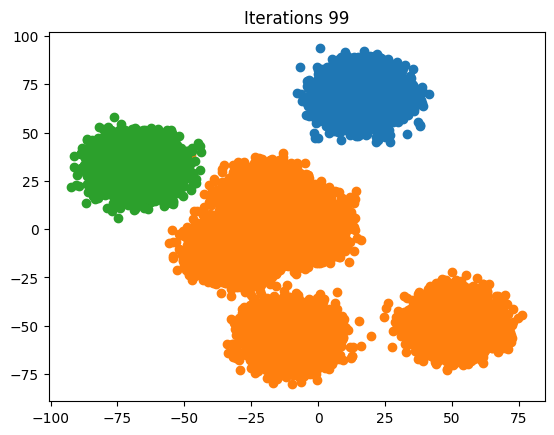

In [10]:
max_iters=100
k=3
centroids=Random_centroids(df,k)
old_centroids=pd.DataFrame()
i=1

while i<max_iters and not centroids.equals(old_centroids):
    old_centroids=centroids
    labels=get_labels(df,centroids)
    centroids=new_centroids(df,labels,k)
    Plot_clusters(df,labels,centroids,i,k)
    i+=1